#  <center>Task 3: Exploratory Data Analysis - Retail</center> 

##  <center>Author- Shubham Thakur</center> 

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv('SampleSuperstore.csv')
print("Data Imported Successfully")

Data Imported Successfully


In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
#droping unwanted columns
df=df.drop(columns = ["Postal Code","Country"])

In [9]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


1. Maximum Profit is 8399.976000
2. Minimum Sales is 0.444000
3. Maximum Sales is 22638.5
4. Max Discount is 0.80

In [10]:
df.nunique()    #to check the unique values in dataset

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


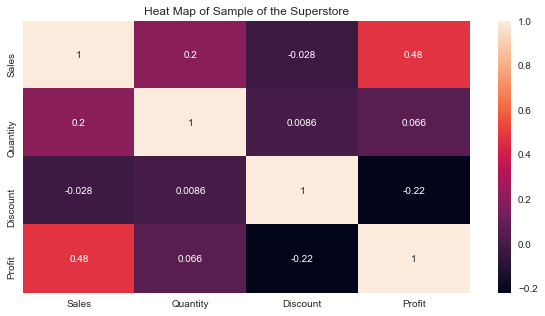

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map of Sample of the Superstore")
plt.show()

1. Maximum correlation is between Sales and Profit
2. Minimum correlation is between Discount and Profit

## Ship Mode

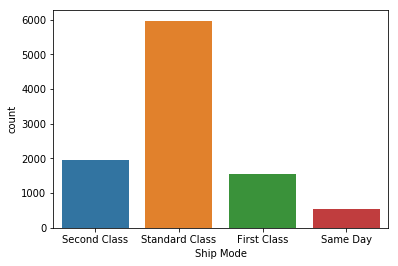

In [13]:
sns.countplot(x=df["Ship Mode"])

In [14]:
mode=df.groupby("Ship Mode").sum()[["Profit","Sales"]].sort_values(by=["Profit","Sales"],ascending = False)
mode

,Profit,Sales
Ship Mode,,
Standard Class,164088.7875,1.358216e+06
Second Class,57446.6354,4.591936e+05
First Class,48969.8399,3.514284e+05
Same Day,15891.7589,1.283631e+05


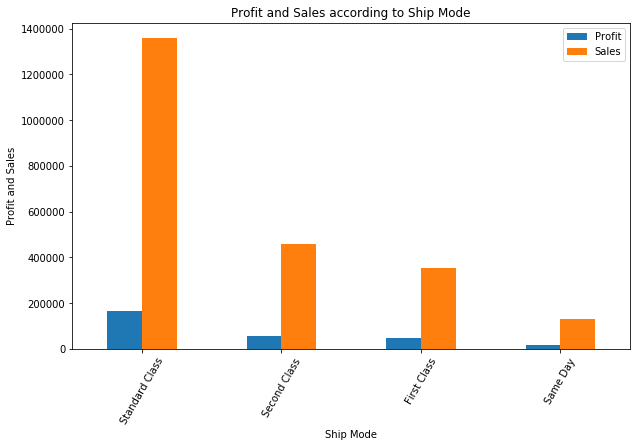

In [15]:
mode.plot(kind="bar",figsize=(10,6))
plt.xlabel("Ship Mode",)
plt.ylabel("Profit and Sales")
plt.xticks(rotation = 60 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Profit and Sales according to Ship Mode')
plt.show()

1. Maximum Profit and Sales  is from Standard Class
2. Minimum Profit and Sales is from Same Day

## Segment

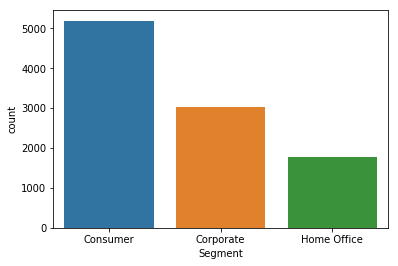

In [16]:
sns.countplot(x=df["Segment"])

In [17]:
segment_profit=df.groupby("Segment").sum()[["Profit","Sales"]].sort_values(by=["Profit","Sales"],ascending = False)
segment_profit

,Profit,Sales
Segment,,
Consumer,134119.2092,1.161401e+06
Corporate,91979.1340,7.061464e+05
Home Office,60298.6785,4.296531e+05


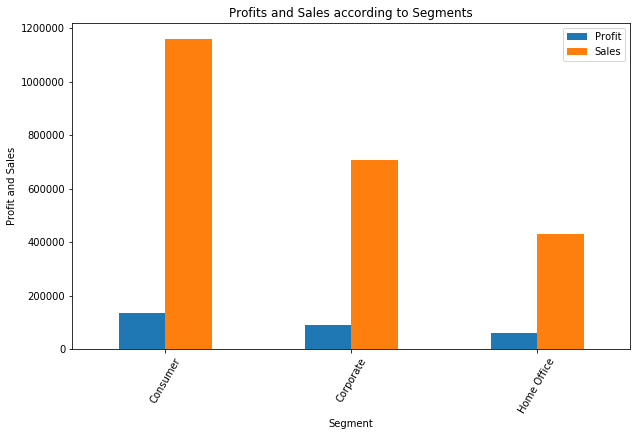

In [18]:
segment_profit.plot(kind="bar",figsize=(10,6))
plt.xlabel("Segment")
plt.ylabel("Profit and Sales")
plt.xticks(rotation = 60 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Profits and Sales according to Segments')
plt.show()

Maximum Profit and sales in Consumer Segment and least in case of Home Office Segment

## Profit according to different States

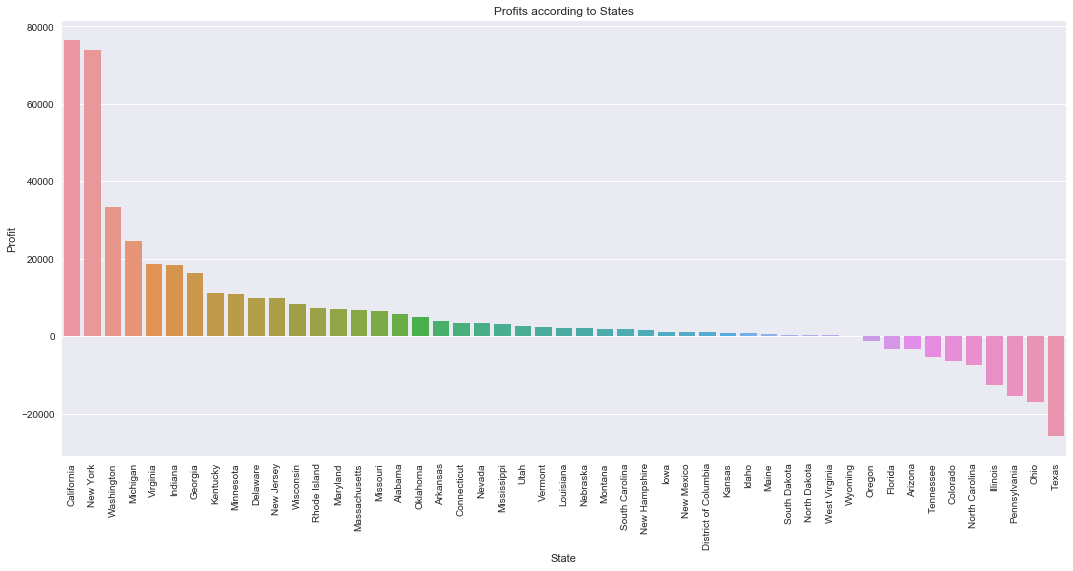

In [47]:
State_profit=df.groupby("State").sum()["Profit"].sort_values(ascending = False).reset_index()
plt.figure(figsize=(18,8))
plt.title('Profits according to States')
sns.barplot(x = 'State', y = 'Profit', data = State_profit)
plt.xticks(rotation = 90 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

1. Maximum Profit in California then Mew York, Washington
2. Minimum Profit in Texas then Ohio, Pennsylvania, Illinois etc

## Sales according to different States

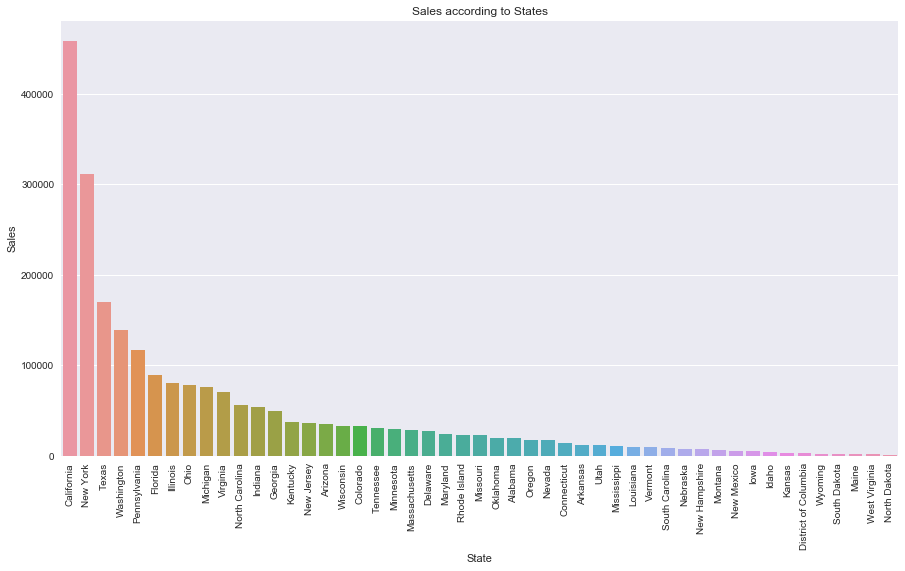

In [48]:
State_sales=df.groupby("State").sum()["Sales"].sort_values(ascending = False).reset_index()
plt.figure(figsize=(15,8))
plt.title('Sales according to States')
sns.barplot(x = 'State', y = 'Sales', data = State_sales)
plt.xticks(rotation = 90 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

1. Maximum Sales in California then New York, Texas 
2. Minimum Sales in North Dakota, West Virginia, Maine etc

## Sales vs Profit according to States


In [21]:
sales=df.groupby(["State"]).Sales.sum().sort_values(ascending= False)
profit=df.groupby(["State"]).Profit.sum().sort_values(ascending= False)

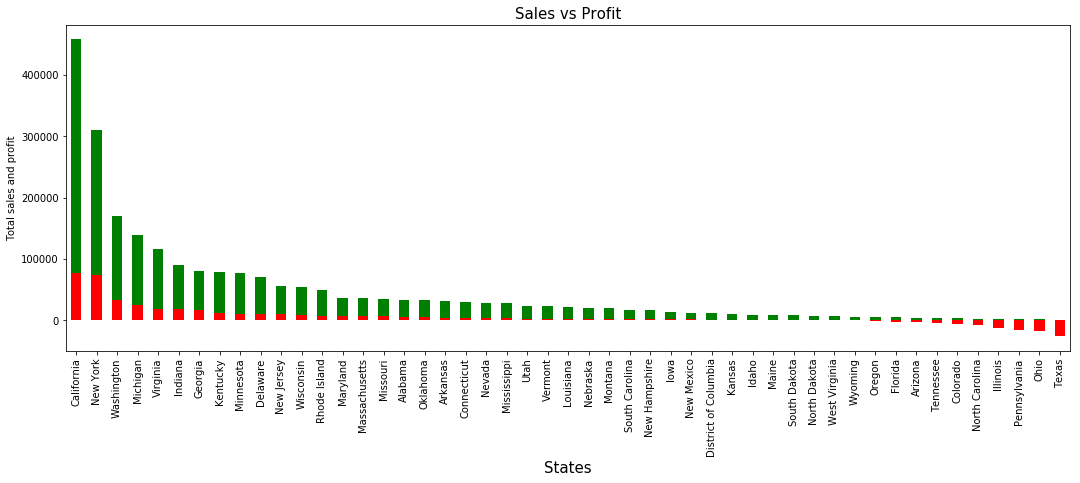

In [22]:
sales.plot(kind='bar', figsize=(18,6),fontsize = 10, color = 'green')
profit.plot(kind='bar', figsize=(18,6),fontsize = 10 , color='red')
plt.xlabel('States',fontsize = 15)

plt.ylabel('Total sales and profit',fontsize = 10)
plt.title("Sales vs Profit",fontsize = 15)
plt.show()

1. Most sales and profit in California and New York
2. Least sales and profit in States like Texas, Ohio, Pennsylvania, North California, and Colorado etc

## Region

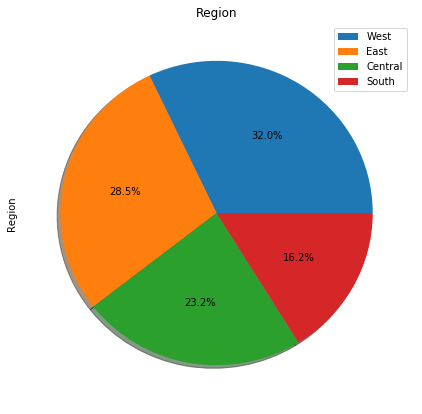

In [23]:
r=df["Region"].value_counts()
r.plot(kind="pie" ,figsize=(7,7),autopct="%1.1f%%",shadow=True,labels=None,)
plt.title("Region")
plt.legend(labels=r.index,loc="upper right")

In [24]:
region=df.groupby("Region").sum()[["Profit","Sales"]].sort_values(by=["Profit","Sales"],ascending = False)
region

,Profit,Sales
Region,,
West,108418.4489,725457.8245
East,91522.7800,678781.2400
South,46749.4303,391721.9050
Central,39706.3625,501239.8908


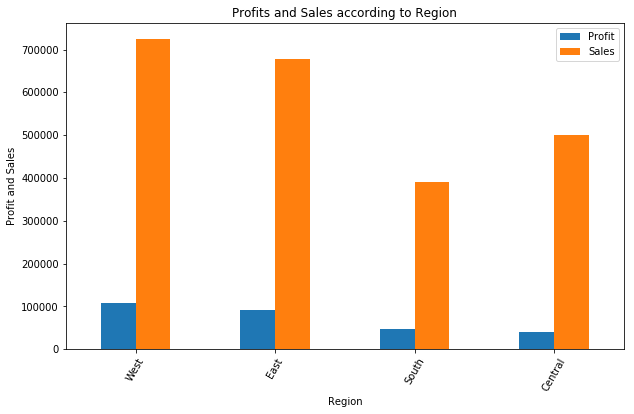

In [25]:
region.plot(kind="bar",figsize=(10,6))
plt.xlabel("Region")
plt.ylabel("Profit and Sales")
plt.xticks(rotation = 60 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Profits and Sales according to Region')
plt.show()

#### Maximum Sales and Profit in West Region and least in Central Region

## Category

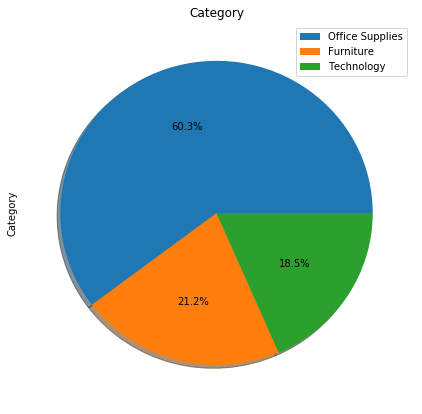

In [26]:
categ=df["Category"].value_counts()
categ.plot(kind="pie" ,figsize=(7,7),autopct="%1.1f%%",shadow=True,labels=None,)
plt.title("Category")
plt.legend(labels=categ.index,loc="upper right")

In [27]:
category=df.groupby("Category").sum()[["Profit","Sales"]].sort_values(by=["Profit","Sales"],ascending = False)
category

,Profit,Sales
Category,,
Technology,145454.9481,836154.0330
Office Supplies,122490.8008,719047.0320
Furniture,18451.2728,741999.7953


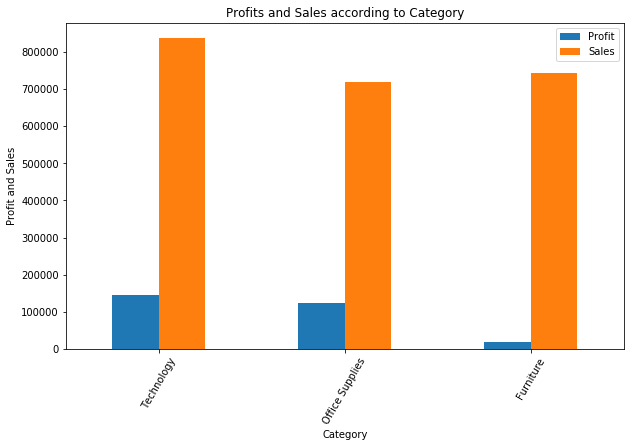

In [28]:
category.plot(kind="bar",figsize=(10,6))
plt.xlabel("Category")
plt.ylabel("Profit and Sales")
plt.xticks(rotation = 60 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Profits and Sales according to Category')
plt.show()

Maximum Sales and Profit in Technology Category least in Furniture

## Sub-Category

In [29]:
sub_categ=df["Sub-Category"].value_counts()
sub_categ

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

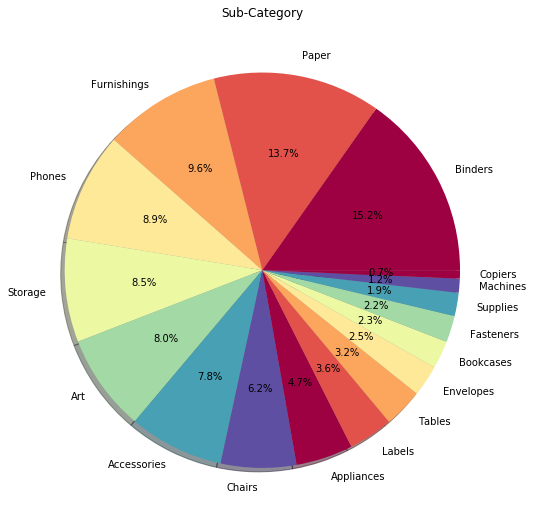

In [30]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Sub-Category')
type_show_ids = plt.pie(sub_categ, labels=sub_categ.index, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

1. Major Distribution is around Binders, Paper and Furishings
2. Least distribution is around Copiers, Machines, Supplies, Fasteners

## Relation Between Sales and Profit

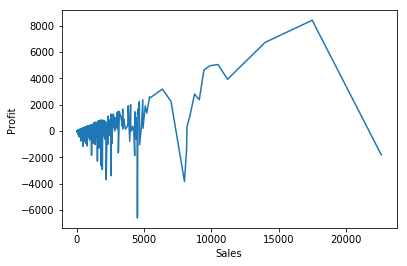

In [31]:
sns.lineplot(x='Sales',y='Profit',data = df)
plt.show()

## Relation Between Discount and Profit

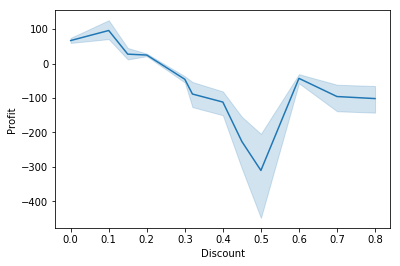

In [33]:
sns.lineplot(x='Discount',y='Profit',data = df)
plt.show()

#### There is minimum profit when Discount is 50%

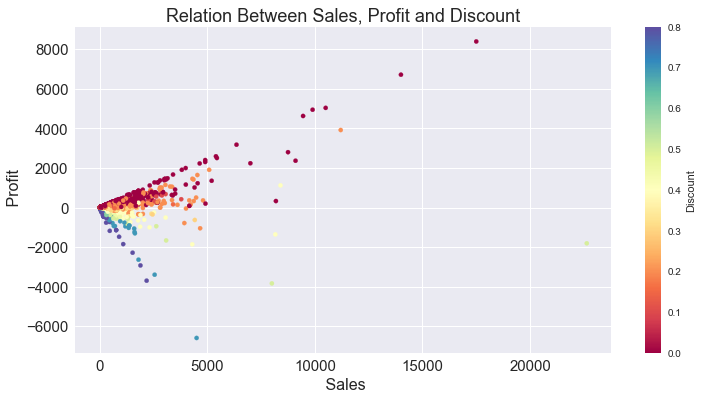

In [41]:
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (12,6), x = "Sales", y= "Profit", c = "Discount", s = 18, fontsize = 15, colormap = "Spectral")
plt.ylabel(' Profit',fontsize = 16)
plt.xlabel(' Sales',fontsize = 16)
plt.title("Relation Between Sales, Profit and Discount",fontsize = 18)
plt.show()


As the discount increases Profit decreases

## Conclusion
### 1. There should be more focus on the standard class as it brings more profit
### 2. Major distrbution of business is around Office Suplies which is least profitable but technology provide more sales and profit    so try to move major distribution towards Technology.
### 3. California and New York are providing maximum profits but states like Texas then Ohio, Pennsylvania, Illinois, North            California, Colorado, Oregon, Florida , Arizona and Tennesseeare are loss making so they should try to minimize their losses    in these states. 
### 4. Western and Eastern region provides maximum profit so, there should be more focus on these regions.
### 5. Texas is No. 3 in case of number of sales but providing least profit so they should cut the discount to gain profit.
### 6. Consumer segment is providing maximum profit so this segment should be encouraged so it brings more sales and profit.


